In [ ]:
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [ ]:
import pandas as pd
import plotly.express as px
from pyspark.sql import functions as F
import plotly
import matplotlib.pyplot as plt


In [ ]:
df = spark.read.option("wholeFile", True).option("multiline",True).option("header", True).option("inferSchema", "True").csv("Playstore_final_1.csv")

In [ ]:
df.printSchema()

In [ ]:
df.show(5)

+--------------------+--------------------+-----------------+------+------------+--------+----------------+----+-----+--------+------------------+---------------+------------+--------------------+--------------------+--------+-----------+--------------------+--------------+------------+----------------+-------------+--------------------+-------+--------------------+-------------+--------------------+---------------------+------------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|            App Name|              App Id|         Category|Rating|Rating Count|Installs|Minimum Installs|Free|Price|Currency|              Size|Minimum Android|Developer Id|   Developer Website|     Developer Email|Released|Last update|      Privacy Policy|Content Rating|Ad Supported|In app purchases|Editor Choice|             Summary|Reviews|Android version Text|    Developer|   Developer Address|Developer In

In [ ]:
df=df.drop("_c40","_c29","_c30","_c31","_c32","_c33","_c34","_c35","_c36","_c37","_c38","_c39","_c41","_c42","_c43","_c44","_c45","_c46","_c47","_c48","_c49","_c50","_c51","_c52","_c53","_c54","_c55","_c56")


In [ ]:
df.cache()
df.persist()

DataFrame[App Name: string, App Id: string, Category: string, Rating: string, Rating Count: string, Installs: string, Minimum Installs: string, Free: string, Price: string, Currency: string, Size: string, Minimum Android: string, Developer Id: string, Developer Website: string, Developer Email: string, Released: string, Last update: string, Privacy Policy: string, Content Rating: string, Ad Supported: string, In app purchases: string, Editor Choice: string, Summary: string, Reviews: string, Android version Text: string, Developer: string, Developer Address: string, Developer Internal ID: string, Version: string]

In [ ]:
dfcategory = df.select('Category').groupBy('Category').agg(F.count('Category').alias('CategoryCount')).orderBy('CategoryCount', ascending=False)

In [ ]:
dfcategoryP = dfcategory.limit(15).toPandas()

In [ ]:
fig = px.bar(
    data_frame= dfcategoryP,
    x= "Category",
    labels={"value":"Top 15 App categories"},
    y= "CategoryCount",
    color= "Category",
    height= 700,
    template=list(plotly.io.templates.keys())[5],
    title= " Top 15 App categories "
)

fig.update_layout(showlegend= True)
fig.show()

In [ ]:
dfAppInstalls   = df.select(df["App Name"],df["Minimum Installs"])
dfAppInstalls  = dfAppInstalls.select('Minimum Installs','App Name').filter(dfAppInstalls["Minimum Installs"] != "0").orderBy('Minimum Installs', ascending=False)
dfAppInstalls  = dfAppInstalls.withColumn("Minimum Installs", dfAppInstalls["Minimum Installs"].cast("int").alias("Installs1"))
dfAppInstalls = dfAppInstalls.dropna()
dfAppInstalls = dfAppInstalls.filter(dfAppInstalls["Minimum Installs"]>=1000000000).orderBy("Minimum Installs",ascending=False).limit(100)
dfAppInstalls1 = dfAppInstalls.distinct()
dfAppInstalls1.show(20)

+----------------+--------------------+
|Minimum Installs|            App Name|
+----------------+--------------------+
|      1000000000|           Instagram|
|      1000000000|              TikTok|
|      1000000000|      Subway Surfers|
|      1000000000|            Snapchat|
|      1000000000|    Candy Crush Saga|
|      1000000000|Spotify: Listen t...|
|      1000000000|       Facebook Lite|
|      1000000000|SHAREit - Transfe...|
|      1000000000|             Twitter|
|      1000000000|             Netflix|
|      1000000000|   Google Play Games|
|      1000000000|Gboard - the Goog...|
|      1000000000|Google Duo - High...|
|      1000000000|Skype - free IM &...|
|      1000000000|    Google Translate|
|      1000000000|Microsoft Word: W...|
|      1000000000|Files by Google: ...|
|      1000000000|            Currents|
|      1000000000|            Messages|
|      1000000000|Android System We...|
+----------------+--------------------+
only showing top 20 rows



In [ ]:
dfAppInstallsP= dfAppInstalls.limit(100).toPandas()

In [ ]:
fig = px.area(dfAppInstallsP, x="App Name", y="Minimum Installs", color="App Name", line_group="App Name",
              template=list(plotly.io.templates.keys())[5],
                title="Top Apps which has Installations greater than a Billion")
fig.show()

In [ ]:
dfAppReview   = df.select(df["App Name"],df["Reviews"])
dfAppReview2  = dfAppReview.select('Reviews','App Name').filter(dfAppReview.Reviews != "N/A").orderBy('Reviews', ascending=False)
dfAppReview3  = dfAppReview2.withColumn("Reviews", dfAppReview2["Reviews"].cast("int").alias("Reviews"))
dfAppReviewCt = dfAppReview3.dropna()
dfAppReviewCt = dfAppReviewCt.orderBy("Reviews",ascending=False).limit(10)
dfAppReviewCt1 = dfAppReviewCt.distinct()
dfAppReviewCt1.show(20)

+--------+--------------------+
| Reviews|            App Name|
+--------+--------------------+
|52377198|Garena Free Fire ...|
|41525718|  WhatsApp Messenger|
|39985223|           Instagram|
|37998715|             YouTube|
|35408357|            Facebook|
|22436297|      Clash of Clans|
|21987741|Messenger – Text ...|
|21986907|Messenger – Text ...|
|17992452|PUBG MOBILE - Tra...|
|16163054|              TikTok|
+--------+--------------------+



In [ ]:
dfAppReviewCtP=dfAppReviewCt.limit(5).toPandas()

In [ ]:
fig = px.funnel(dfAppReviewCtP, x='Reviews', y='App Name',
                template=list(plotly.io.templates.keys())[5],
                title="Top 5 Apps which has highest number of Reviews")

fig.show()

In [ ]:
dfAppReview2.show(100)

+--------------------+--------------------+
|             Reviews|            App Name|
+--------------------+--------------------+
|very professional"""|Couple Dual Photo...|
|tricks to be the ...|Woodworking Proje...|
|                free|Step Tracker - Pe...|
|You Can Always Be...|Success Quotes Wa...|
|                TRUE|"Yanosik: ""anti-...|
|                Rose| Rosa Live Wallpaper|
|Quiz: guess the p...|"""Тайны Микромир...|
|                  Q8|🚗 Wallpapers for...|
|Puzzle"" is educa...|Learn Days and Mo...|
|               Photo|"world heritage a...|
|Personalize these...|Speed Boat Racing...|
|Personalize these...|Bike Mayhem Mount...|
|Mozart's Lullaby ...|  "Колыбельная ""Спи|
|It is simple and ...|           Flowering|
|                9999|Racing Car Drivin...|
|                9999|   Galaxy Battleship|
|                9997|English to Urdu D...|
|               99952|    Basketball Mania|
|                9992|        Lucky Looter|
|                9991|Launcher Li

In [ ]:
dfCateFree= df.select(df["Category"],df["Free"])

In [ ]:
from pyspark.sql.functions import count, avg
dfCateFree=dfCateFree.groupBy("Category", "Free").agg( count("*").alias("Count"))

In [ ]:
dfCateFree= dfCateFree.filter((dfCateFree.Free == "TRUE")|(dfCateFree.Free == "FALSE"))

In [ ]:
dfCateFreeP=dfCateFree.toPandas()
dfCateFreeP = dfCateFreeP.pivot('Category', 'Free', 'Count').fillna(0).reset_index()

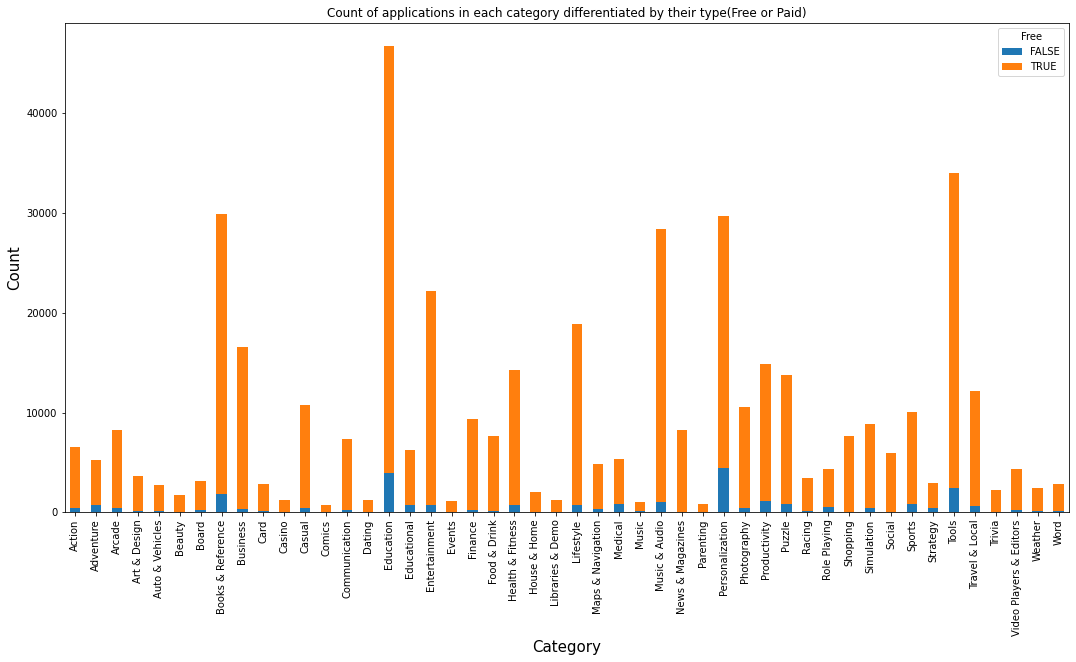

In [ ]:
dfCateFreeP.set_index('Category').plot(kind='bar', stacked=True, figsize=(18,9))
plt.xlabel("Category", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Count of applications in each category differentiated by their type(Free or Paid)")
plt.show()

In [ ]:

dfFree = df.select('Free').groupBy('Free').agg(F.count('Free').alias('FreeCount')).orderBy('FreeCount', ascending=False)

In [ ]:
dfFreeP=dfFree.limit(2).toPandas()
dfFreeP['FreeCount'] = dfFreeP['FreeCount'].astype(int)

In [ ]:
fig = px.pie(dfFreeP, values='FreeCount', 
    template=list(plotly.io.templates.keys())[5],
    title='Free Vs Paid Apps')
fig.show()

In [ ]:
dfRating= df.withColumn("Rating", df["Rating"].cast("float").alias("Rating"))

In [ ]:
dfRating = dfRating.withColumn("Rating", F.round(dfRating["Rating"], 1))

In [ ]:
dfRating = dfRating.select('Rating').filter(dfRating.Rating != "0.0").filter(dfRating.Rating <= "5.0").groupBy('Rating').agg(F.count('Rating').alias('RatingCount')).orderBy('RatingCount', ascending=False)

In [ ]:
dfRatingP= dfRating.toPandas()

In [ ]:
dfRatingP['Rating'].describe()

count    41.000000
mean      3.000000
std       1.197915
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Rating, dtype: float64

In [ ]:
fig = px.scatter(
    dfRatingP,
    title="Rating Distribution ",
    x="Rating", 
    y="RatingCount", 
    color="Rating",
    template="plotly_dark"
)
fig.update_layout(showlegend= False)
fig.show()

In [ ]:
dfAppInstalls   = df.select(df["App Name"],df["Minimum Installs"])
dfAppInstalls  = dfAppInstalls.select('Minimum Installs','App Name').filter(dfAppInstalls["Minimum Installs"] != "0").orderBy('Minimum Installs', ascending=False)
dfAppInstalls  = dfAppInstalls.withColumn("Minimum Installs", dfAppInstalls["Minimum Installs"].cast("int").alias("Installs1"))
dfAppInstalls = dfAppInstalls.dropna()
dfAppInstalls = dfAppInstalls.filter(dfAppInstalls["Minimum Installs"]>=1000000000).orderBy("Minimum Installs",ascending=False).limit(100)
dfAppInstalls.show(20)

+----------------+--------------------+
|Minimum Installs|            App Name|
+----------------+--------------------+
|      1000000000|           Instagram|
|      1000000000|              TikTok|
|      1000000000|              TikTok|
|      1000000000|      Subway Surfers|
|      1000000000|            Snapchat|
|      1000000000|            Snapchat|
|      1000000000|    Candy Crush Saga|
|      1000000000|Spotify: Listen t...|
|      1000000000|Spotify: Listen t...|
|      1000000000|       Facebook Lite|
|      1000000000|SHAREit - Transfe...|
|      1000000000|SHAREit - Transfe...|
|      1000000000|             Twitter|
|      1000000000|             Twitter|
|      1000000000|             Netflix|
|      1000000000|             Netflix|
|      1000000000|   Google Play Games|
|      1000000000|Gboard - the Goog...|
|      1000000000|Google Duo - High...|
|      1000000000|Skype - free IM &...|
+----------------+--------------------+
only showing top 20 rows



In [ ]:
dfAppInstallsP= dfAppInstalls.limit(100).toPandas()
fig = px.area(dfAppInstallsP, x="App Name", y="Minimum Installs", color="App Name", line_group="App Name",
              template=list(plotly.io.templates.keys())[5],
                title="Top Apps which has Installations greater than a Billion")
fig.show()

In [ ]:
dfAppReview   = df.select(df["App Name"],df["Reviews"])
dfAppReview2  = dfAppReview.select('Reviews','App Name').filter(dfAppReview.Reviews != "N/A").orderBy('Reviews', ascending=False)
dfAppReview3  = dfAppReview2.withColumn("Reviews", dfAppReview2["Reviews"].cast("int").alias("Reviews"))
dfAppReviewCt = dfAppReview3.dropna()
dfAppReviewCt = dfAppReviewCt.orderBy("Reviews",ascending=False).limit(10)
dfAppReviewCt.show(10)

+--------+--------------------+
| Reviews|            App Name|
+--------+--------------------+
|52377198|Garena Free Fire ...|
|41525718|  WhatsApp Messenger|
|39985223|           Instagram|
|37998715|             YouTube|
|35408357|            Facebook|
|22436297|      Clash of Clans|
|21987741|Messenger – Text ...|
|21986907|Messenger – Text ...|
|17992452|PUBG MOBILE - Tra...|
|16163054|              TikTok|
+--------+--------------------+



In [ ]:
dfAppReviewCtP=dfAppReviewCt.toPandas()

In [ ]:
fig = px.funnel(dfAppReviewCtP, x='Reviews', y='App Name',
                template=list(plotly.io.templates.keys())[5],
                title="Top 10 Apps which has highest number of Reviews")

fig.show()